In [7]:
!pip install pandas
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [8]:
# Basic libraries
import pandas as pd
import numpy as np

In [9]:
# Visualization (optional today)
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
# Show all columns
pd.set_option('display.max_columns', None)

In [12]:
# Load the datasets
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")


In [13]:
print(movies)

      movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                                  Comedy|Romance  
3                            Comedy|Drama|Romance  
4                  

In [14]:
print(ratings)

        userId  movieId  rating   timestamp
0            1        1     4.0   964982703
1            1        3     4.0   964981247
2            1        6     4.0   964982224
3            1       47     5.0   964983815
4            1       50     5.0   964982931
...        ...      ...     ...         ...
100831     610   166534     4.0  1493848402
100832     610   168248     5.0  1493850091
100833     610   168250     5.0  1494273047
100834     610   168252     5.0  1493846352
100835     610   170875     3.0  1493846415

[100836 rows x 4 columns]


In [15]:
# Look at first few rows
print(movies.head())
print(ratings.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [16]:
# Merge datasets
df = ratings.merge(movies, on='movieId')

In [17]:
df.head(100)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
95,1,1445,3.0,964984112,McHale's Navy (1997),Comedy|War
96,1,1473,4.0,964980875,Best Men (1997),Action|Comedy|Crime|Drama
97,1,1500,4.0,964980985,Grosse Pointe Blank (1997),Comedy|Crime|Romance
98,1,1517,5.0,964981107,Austin Powers: International Man of Mystery (1...,Action|Adventure|Comedy


In [18]:
df.isnull().sum()


userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


In [22]:
df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [23]:
# Number of unique users and movies
print("Total Users :", df['userId'].nunique())
print("Total Movies:", df['movieId'].nunique())

Total Users : 610
Total Movies: 9724


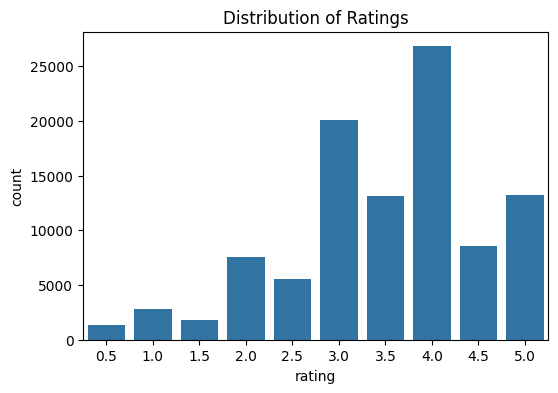

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(x='rating', data=df)
plt.title("Distribution of Ratings")
plt.show()


In [25]:
top_movies = df['title'].value_counts().head(10)
print(top_movies)


title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: count, dtype: int64


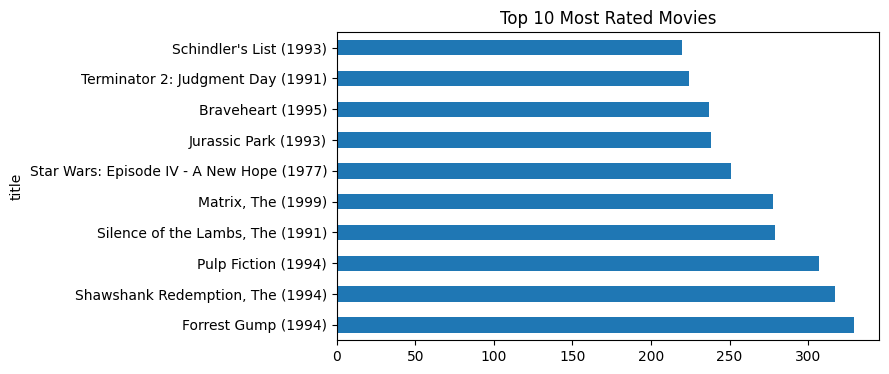

In [26]:
top_movies.plot(kind='barh', figsize=(7,4), title="Top 10 Most Rated Movies")
plt.show()

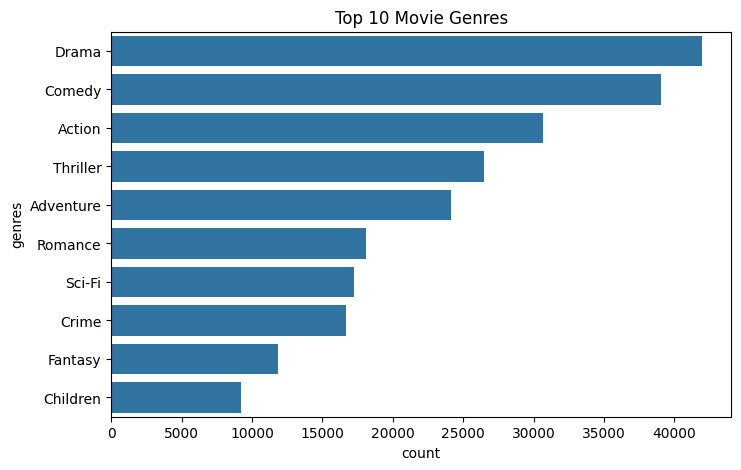

In [27]:
df['genres'] = df['genres'].str.split('|')
df_exploded = df.explode('genres').reset_index(drop=True)

plt.figure(figsize=(8,5))
sns.countplot(y='genres', data=df_exploded, order=df_exploded['genres'].value_counts().index[:10])
plt.title("Top 10 Movie Genres")
plt.show()

In [28]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel

In [31]:
# Combine movie title and genres into one feature for simplicity
df['genres'] = df['genres'].fillna('').astype(str)

df['combined_features'] = df['title'] + " " + df['genres']
df['combined_features'].head()

0    Toy Story (1995) ['Adventure', 'Animation', 'C...
1        Grumpier Old Men (1995) ['Comedy', 'Romance']
2          Heat (1995) ['Action', 'Crime', 'Thriller']
3    Seven (a.k.a. Se7en) (1995) ['Mystery', 'Thril...
4    Usual Suspects, The (1995) ['Crime', 'Mystery'...
Name: combined_features, dtype: object

In [32]:
movies = df.copy()

In [33]:
# Remove duplicate movie titles
movies = movies.drop_duplicates(subset='title', keep='first').reset_index(drop=True)

In [34]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['genres'])

In [35]:
indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()

In [36]:
def get_recommendations(title):
    if title not in indices:
        return "Movie not found in dataset!"

    idx = indices[title]
    sim_scores = linear_kernel(tfidf_matrix[idx], tfidf_matrix).flatten()
    sim_scores_indices = sim_scores.argsort()[::-1]
    sim_scores_indices = sim_scores_indices[sim_scores_indices != idx]
    top_indices = sim_scores_indices[:10]

    return movies['title'].iloc[top_indices]


In [37]:
get_recommendations('Heat (1995)')

783            Bourne Supremacy, The (2004)
5724                        No Mercy (1986)
1331       Headhunters (Hodejegerne) (2011)
5741                       Hard Rain (1998)
7160                           Blitz (2011)
2122                     Dirty Harry (1971)
2163                       Assassins (1995)
5757                          Hitman (2007)
5672    Sin City: A Dame to Kill For (2014)
1279                   Bank Job, The (2008)
Name: title, dtype: object